In [1]:
import warnings
warnings.filterwarnings("ignore")

из методички Коротеева 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [4]:
X.shape, Y.shape

((1000, 5), (1000,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [7]:
X_test.shape, Y_test.shape

((200, 5), (200,))

In [8]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [9]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [10]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [11]:
import pandas as pd
import seaborn as sns

In [12]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
4,Gaussian_Process,0.910
8,Random_Forest,0.910
9,Neural_Net,0.910
1,Linear_SVM,0.890
11,Naive_Bayes,0.890
0,Nearest_Neighbors,0.875
6,Decision_Tree,0.875
12,QDA,0.875
2,Polynomial_SVM,0.870
3,RBF_SVM,0.865


In [13]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
4,Gaussian_Process,0.910000
8,Random_Forest,0.910000
9,Neural_Net,0.910000
1,Linear_SVM,0.890000
11,Naive_Bayes,0.890000
0,Nearest_Neighbors,0.875000
6,Decision_Tree,0.875000
12,QDA,0.875000
2,Polynomial_SVM,0.870000
3,RBF_SVM,0.865000


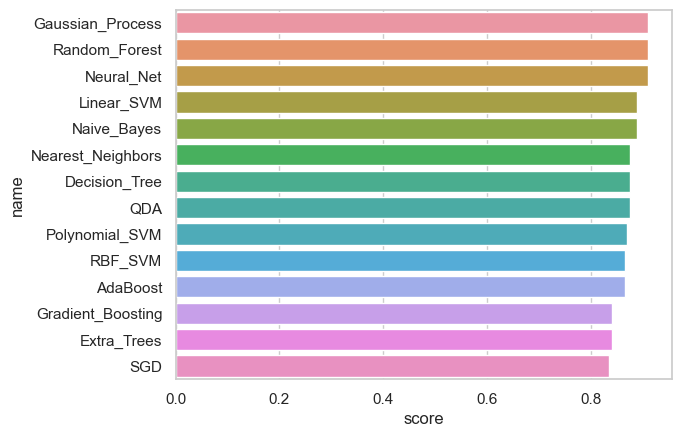

In [14]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [15]:
df = pd.read_csv("Advertising.csv")

In [16]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import ElasticNet

In [19]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alph

In [20]:
base_elastic_model = ElasticNet()

In [21]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# число verbose выбирайте сами
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [24]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [25]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [26]:
y_pred = grid_model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(y_test,y_pred)

2.3873426420874737

Контрольные вопросы

     1.Зачем нужно производить оптимизацию гиперпараметров?
     2.В чём заключается процесс оптимизации гиперпараметров?
     3.В чем достоинства и недостатки метода gridsearchcv?
     4.Какие еще стратегии оптимизации гиперпараметров существуют?
     5.Почему при использовании GridSearchCV не нужна валидационная выборка?


1. Оптимизация гиперпараметров необходима для улучшения производительности модели машинного обучения. Гиперпараметры - это параметры, которые задаются до начала процесса обучения и напрямую влияют на его ход и итоговую производительность модели. Оптимизация гиперпараметров позволяет настроить модель так, чтобы она давала наилучшие результаты на данных.

2.Процесс оптимизации гиперпараметров обычно включает выбор набора значений гиперпараметров, обучение моделей с каждым из этих наборов и оценку качества моделей с использованием некоторой метрики. Оптимальные гиперпараметры - это те, при которых модель показывает наилучшее качество на проверочных данных.

3.Достоинства метода GridSearchCV:

    Простота и понятность метода.
    
    Возможность тестирования всех возможных комбинаций гиперпараметров.
    
    Гарантированный поиск оптимального набора гиперпараметров (при условии, что он находится в заданной сетке).

Недостатки метода GridSearchCV:

    Потребление большого объема времени и ресурсов, особенно при большом количестве гиперпараметров и/или большом количестве их           возможных значений.
    
    Может быть неэффективным, если некоторые гиперпараметры влияют на качество модели существенно меньше, чем другие.

4.Кроме GridSearchCV, существуют другие стратегии оптимизации гиперпараметров:
RandomizedSearchCV: вместо исчерпывающего перебора всех комбинаций, этот метод выбирает случайные комбинации гиперпараметров для обучения. Это обычно более быстрый и эффективный метод по сравнению с GridSearchCV.

Байесовская оптимизация: Этот метод использует принципы байесовской статистики для оценки функции потерь и выбора следующего набора параметров для оценки.

Генетические алгоритмы и эволюционные алгоритмы: Эти методы используют принципы биологической эволюции, такие как мутации, кроссинговер и отбор, для оптимизации гиперпараметров.

5.При использовании GridSearchCV валидационная выборка не требуется, потому что GridSearchCV автоматически использует кросс-валидацию для оценки производительности различных комбинаций гиперпараметров. Кросс-валидация включает в себя разделение обучающего набора данных на k подмножеств (или "фолдов"), обучение модели на k-1 фолдов, а затем проверку производительности модели на оставшемся фолде. Этот процесс повторяется k раз, и результаты усредняются, чтобы получить окончательную оценку производительности модели. Это позволяет использовать все доступные данные для обучения и валидации, минимизируя риск переобучения.

Дополнительные задания

1.При выборе модели мы обычно выбираем ту, которая дает наибольшее значение какой-то метрики. Но это означает, что эта оценка метрики уже становится завышенной. Поэтому для объективной оценки качества модели ее опять следует оценить на новом наборе данных. Поэтому для выбора модели нужно разделить выборку на три части - обучающую, валидационную и тестовую. Повторите первую часть работы, но с таким разбиением и получите несмещенную оценку качества наилучшей модели.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Загрузка данных
df = pd.read_csv("Advertising.csv")
df.head()

# Создание X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий, валидационный и тестовый наборы данных
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=101)

# Масштабирование данных
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Определение модели ElasticNet
base_elastic_model = ElasticNet()

# Задание сетки параметров для поиска
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

# Создание и обучение модели GridSearchCV
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)
grid_model.fit(X_train, y_train)

# Вывод лучшего оценщика
print(grid_model.best_estimator_)

# Предсказание на валидационной выборке
y_pred_val = grid_model.predict(X_val)

# Вычисление среднеквадратической ошибки на валидационной выборке
print(mean_squared_error(y_val, y_pred_val))

# Предсказание на тестовой выборке
y_pred_test = grid_model.predict(X_test)

# Вычисление среднеквадратической ошибки на тестовой выборке
print(mean_squared_error(y_test, y_pred_test))


Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
ElasticNet(alpha=0.1, l1_ratio=1)
3.135391127086755
2.079295046208064


2.	Оптимизируйте гиперпараметры той же модели, но другим методом - случайным поиском. Сравните полученные результаты.

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Разбиваем данные на обучающий и тестовый наборы
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

# Масштабируем данные
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Определяем сетку гиперпараметров для случайного поиска
param_dist = {'alpha': uniform(0.1, 100),
              'l1_ratio': uniform(0.1, 1)}

# Создаем модель ElasticNet
base_elastic_model = ElasticNet()

# Создаем экземпляр RandomizedSearchCV и обучаем модель
rand_search = RandomizedSearchCV(base_elastic_model, param_distributions=param_dist,
                                 scoring='neg_mean_squared_error', n_iter=100, cv=5, random_state=101)
rand_search.fit(X_train,y_train)

# Выводим наилучший набор гиперпараметров
print("Лучшие гиперпараметры: ", rand_search.best_params_)

# Делаем предсказания на валидационной выборке и вычисляем MSE
y_pred_valid = rand_search.predict(X_valid)
print('MSE на валидационных данных:', mean_squared_error(y_valid, y_pred_valid))

# Делаем предсказания на тестовой выборке и вычисляем MSE
y_pred_test = rand_search.predict(X_test)
print('MSE на тестовых данных:', mean_squared_error(y_test, y_pred_test))


Лучшие гиперпараметры:  {'alpha': 0.6438115171046975, 'l1_ratio': 0.7506613233372009}
MSE на валидационных данных: 4.598291157835562
MSE на тестовых данных: 4.259430230428419


3.	Во второй задаче найдите наиболее эффективный класс моделей, а затем оптимизируйте гиперпараметры у этой модели. Сравните, насколько лучше получилась модель.

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Создаем список моделей для сравнения
models = [
    RandomForestRegressor(),
    SVR(),
    Lasso()
]

# Создаем словарь с пространством гиперпараметров для каждой модели
param_grids = {
    'RandomForestRegressor': {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Lasso': {'alpha': [0.1, 1, 10]}
}

# Переменные для хранения наилучших моделей и их гиперпараметров
best_model = None
best_params = None
best_score = float('-inf')

# Итерируемся по моделям и выполняем оптимизацию гиперпараметров
for model in models:
    model_name = model.__class__.__name__
    
    # Создаем экземпляр GridSearchCV для текущей модели
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grids[model_name],
                               scoring='neg_mean_squared_error',
                               cv=5)
    
    # Обучаем модель с использованием GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Получаем наилучшие гиперпараметры и оценку на валидационной выборке
    best_params = grid_search.best_params_
    score = grid_search.best_score_
    
    # Сравниваем оценку с лучшей найденной оценкой
    if score > best_score:
        best_model = model
        best_params = best_params
        best_score = score

# Обучаем наилучшую модель с наилучшими гиперпараметрами на обучающем наборе данных
best_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовой выборке
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Оценка на тестовой выборке:", mse)


Оценка на тестовой выборке: 0.5572099666666621


In [35]:
from sklearn import *
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',